# SciPy Optimize root_scalar
`scipy.optimize.root_scalar` is a routine to to solve the problem
$$
f(x)=0 \qquad x \in \mathbb{R}.
$$
This problem is also known as determining the roots or zeros of the function.  The routine in particular applies to one dimensional, scalar valued functions.  See `scipy.optimize.root` for a multidimensional generalization.

In [2]:
# Importing the packages for the example
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

We need to define a function for testing the algorithm. To demonstrate two different types of zeros (normal and a multiplicity two zero), I use the function
$$
f(x) = x \sin(x).
$$
At $x=0$, this function hits zero but does not cross the axis. Bracket-type methods, explained below, need the function evaluated at both positive and negative values and, therefore, fail on even multiplicity zeros like $x=0$.

Some methods can use the derivative, or even second derivative, so I am defining those quantities here as well.

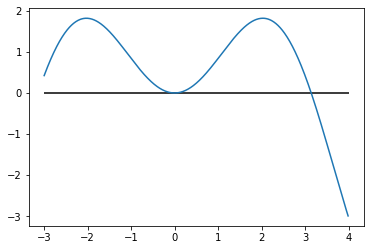

In [3]:
f = lambda x : x*np.sin(x)

fp = lambda x : np.sin(x) + x * np.cos(x)

fp2 = lambda x : 2*np.cos(x) - np.sin(x)

x=np.arange(-3,4,.01)
plt.hlines(0,-3,4)
plt.plot(x,f(x)) 

### Calling the function: Methods and Initial Information

`root_scalar` is a <i>wrapper</i> to a variety of different methods beneath the hood.  Different methods require different initial information for locating a zero.

Bracket-type methods require a bracket of `[a,b]` where `f(a)` and `f(b)` have different signs. These methods would fail for zeros of even multiplicity where the function touches but does not cross the axis.

For the simplest call, this would look like:

In [33]:
result = optimize.root_scalar(f,bracket=[2,4])  # check f(2)*f(4) = -1
print(result)

      converged: True
           flag: 'converged'
 function_calls: 10
     iterations: 9
           root: 3.141592653589795


Bracket methods include:
* bisect
* brentq
* brenth
* ridder
* toms748

Bisect is the simplest conceptually and easiest to code, while methods like Brent's method or the newer toms748 use quadratic interpolation for speedup.  

We can specify which of these we want in particular using the `method` flag:

In [31]:
result_ridder=optimize.root_scalar(f,bracket=[2,4],method="bisect")
print(result_ridder)

      converged: True
           flag: 'converged'
 function_calls: 42
     iterations: 40
           root: 3.1415926535901235


Householder method's use some sort of derivative instead. The given information completely specifies the method, but you could specify the method using the `method` flag as well.

| Method | Points | First Deriative | Second Derivative |
| --- | --- |--- | --- |
| Secant | 2 |  | |
| Newtons | 1 | Y |  |
| Halley's | 1 | Y | Y |

In [32]:
result_secant = optimize.root_scalar(f,x0=1,x1=2)
print(result_secant)

      converged: True
           flag: 'converged'
 function_calls: 35
     iterations: 34
           root: 2.198829611671715e-08


In [34]:
result_newtons = optimize.root_scalar(f,fprime=fp,x0=1)
print(result_newtons)

      converged: True
           flag: 'converged'
 function_calls: 52
     iterations: 26
           root: 1.125384604853057e-08


In [35]:
result_halleys = optimize.root_scalar(f,x0=1,fprime=fp,fprime2=fp2)
print(result_halleys)

      converged: True
           flag: 'converged'
 function_calls: 54
     iterations: 18
           root: 3.1514718354536172e-09


## Return Object

`root_scalar` returns a `RootResults` object based on a dictionary.  Individual attirbutes in the dictionary can be accessed like:

In [13]:
result1.root

3.141592653589795

## `args` and function parameters

If our function takes in a parameter, then we can pass it to the `root_scalar` algorithm in a tuple using the flag `args`.

In [26]:
f_parameter = lambda x, a : x-a

result_args = optimize.root_scalar(f_parameter,bracket=[0,2], args=(1,))
print(result_args.root)

1.0


## Tolerance and Max Iterations

How much computer time do you want to spend on this problem? How accurate do you need your answer? Is your function really expensive to calculate?

If you want more control over these aspects of your problem, you can use 
* `xtol`: The absolute tolerance for termination
* `rtol`: the relative tolerance for termination
* `maxiter`: the maximum number of iteration

When the two successive values are within the tolerance range of each other or the routine has reached the maximum number of iterations, the routine will exit.  Relative tolerance is scaled by the size of the current values. For example, if two successive values are 5 apart, but both a trillion, the routine can exit.

Let's try setting a `maxiter` that is way too low:

In [37]:
result_maxiter = optimize.root_scalar(f,x0=1,x1=2,maxiter=3)
print(result_maxiter)

      converged: False
           flag: 'convergence error'
 function_calls: 5
     iterations: 3
           root: 0.06388659504879228


In this situation we get a `'convergence error'`.  If you get that, you need to increase the number of iterations, choose a better starting point, or otherwise tune the optimization.

Let's set the absolute and relative tolerances:

In [50]:
result_xtol = optimize.root_scalar(f,x0=1,x1=2,xtol=1e-10,rtol=1e-10)
print(result_xtol)

      converged: True
           flag: 'converged'
 function_calls: 46
     iterations: 45
           root: 1.104911602953554e-10
